In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset

In [2]:
data = {
    "Sepal Length (cm)": [5.1, 4.9, 4.7, 4.6, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 6.3, 5.8, 7.1, 6.3, 6.5],
    "Sepal Width (cm)": [3.5, 3.0, 3.2, 3.1, 3.6, 3.2, 3.2, 3.1, 2.3, 2.8, 3.3, 2.7, 3.0, 2.9, 3.0],
    "Petal Length (cm)": [1.4, 1.4, 1.3, 1.5, 1.4, 4.7, 4.5, 4.9, 4.0, 4.6, 6.0, 5.1, 5.9, 5.6, 5.8],
    "Petal Width (cm)": [0.2, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 2.5, 1.9, 2.1, 1.8, 2.2],
    "Species": ["FlowerA", "FlowerA", "FlowerA", "FlowerA", "FlowerA", "FlowerB", "FlowerB", "FlowerB", "FlowerB", "FlowerB", "FlowerC", "FlowerC", "FlowerC", "FlowerC", "FlowerC"]
}
df = pd.DataFrame(data)

In [3]:
# 1. Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


In [4]:
# 2. Generate summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
       Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  \
count          15.000000          15.00000          15.000000   
mean            5.906667           3.06000           3.873333   
std             0.873798           0.31803           1.891887   
min             4.600000           2.30000           1.300000   
25%             5.050000           2.95000           1.450000   
50%             6.300000           3.10000           4.600000   
75%             6.500000           3.20000           5.350000   
max             7.100000           3.60000           6.000000   

       Petal Width (cm)  
count         15.000000  
mean           1.246667  
std            0.829687  
min            0.200000  
25%            0.200000  
50%            1.500000  
75%            1.850000  
max            2.500000  


In [5]:
# Calculate mean and standard deviation of Sepal Length
mean_sepal_length = df["Sepal Length (cm)"].mean()
std_sepal_length = df["Sepal Length (cm)"].std()
print(f"\nMean of Sepal Length: {mean_sepal_length}")
print(f"Standard Deviation of Sepal Length: {std_sepal_length}")


Mean of Sepal Length: 5.906666666666666
Standard Deviation of Sepal Length: 0.8737984948051866


In [6]:
# 3. Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
Sepal Length (cm)    0
Sepal Width (cm)     0
Petal Length (cm)    0
Petal Width (cm)     0
Species              0
dtype: int64


In [7]:
# 4. Convert species labels to numerical values
species_mapping = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}
df['Species'] = df['Species'].map(species_mapping)
print("\nDataset with numerical species labels:")
print(df.head())


Dataset with numerical species labels:
   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [8]:
# 5. Split the dataset into training and testing sets
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [9]:
# 6. Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

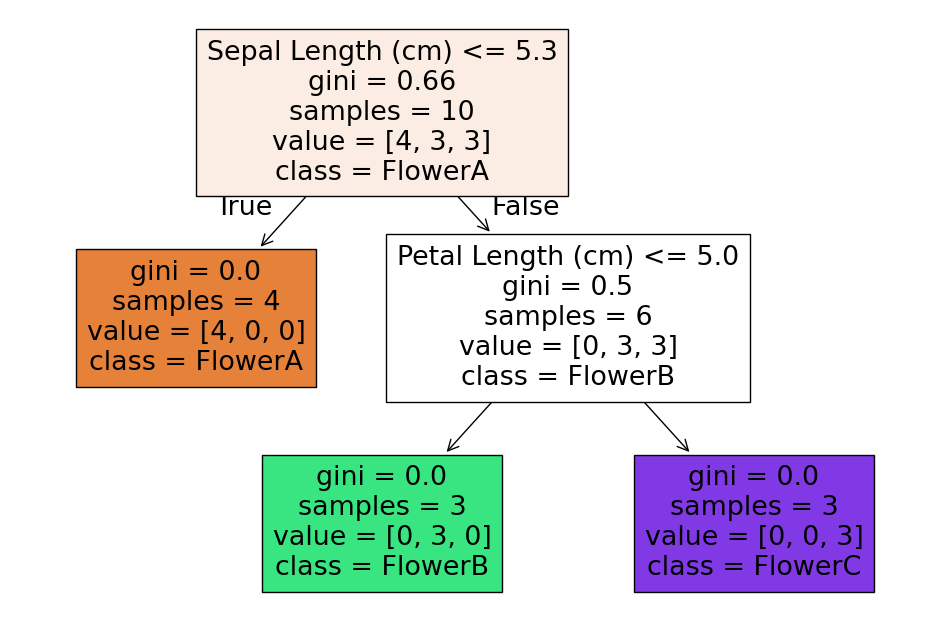

In [10]:
# 7. Visualize the trained decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=['FlowerA', 'FlowerB', 'FlowerC'], filled=True)
plt.show()

In [11]:
# 8. Predict the species for the testing data and compute the accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy}")


Accuracy: 1.0


In [12]:
# 9. Generate a classification report and a confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['FlowerA', 'FlowerB', 'FlowerC']))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     FlowerA       1.00      1.00      1.00         1
     FlowerB       1.00      1.00      1.00         2
     FlowerC       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [0 0 2]]


# doing agin with csv

# Load dataset into DataFrame

In [13]:
df = pd.read_csv('flower.csv')
print(df.head())

   Sepal Length (cm)  Sepal Width (cm)  Petal Length (cm)  Petal Width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Species  
0  FlowerA  
1  FlowerA  
2  FlowerA  
3  FlowerA  
4  FlowerA  


# Generate summary statistics for the dataset. What are the mean and standard deviation of the Sepal Length?


In [14]:
# Summary statistics
summary_stats = df.describe()

In [15]:
# Mean and standard deviation of Sepal Length
mean_sepal_length = summary_stats.loc['mean', 'Sepal Length (cm)']
std_dev_sepal_length = summary_stats.loc['std', 'Sepal Length (cm)']

print(f"Mean Sepal Length: {mean_sepal_length:.2f} cm")
print(f"Standard Deviation of Sepal Length: {std_dev_sepal_length:.2f} cm")

Mean Sepal Length: 5.91 cm
Standard Deviation of Sepal Length: 0.87 cm


# Check for any missing values in the dataset. How would you handle them if there were any?

In [16]:
# Check for missing values
missing_values = df.isnull().sum()

In [17]:
if missing_values.any():
    # If there are missing values, handle them (e.g., drop rows, fill with mean, etc.)
    df = df.dropna()  # Example: Drop rows with missing values

# Convert the species labels to numerical values using a mapping dictionary.

In [18]:
# Mapping dictionary
species_map = {'FlowerA': 0, 'FlowerB': 1, 'FlowerC': 2}

# Apply mapping to 'Species' column
df['Species'] = df['Species'].map(species_map)

# Split the dataset into training and testing sets with a 70-30 split, stratified based on species.

In [19]:
from sklearn.model_selection import train_test_split

# Split dataset into features (X) and target (y)
X = df.drop('Species', axis=1)
y = df['Species']

# Split into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Train a decision tree classifier on the training data. Specify parameters for the decision tree.

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Fit the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# Visualize the trained decision tree.

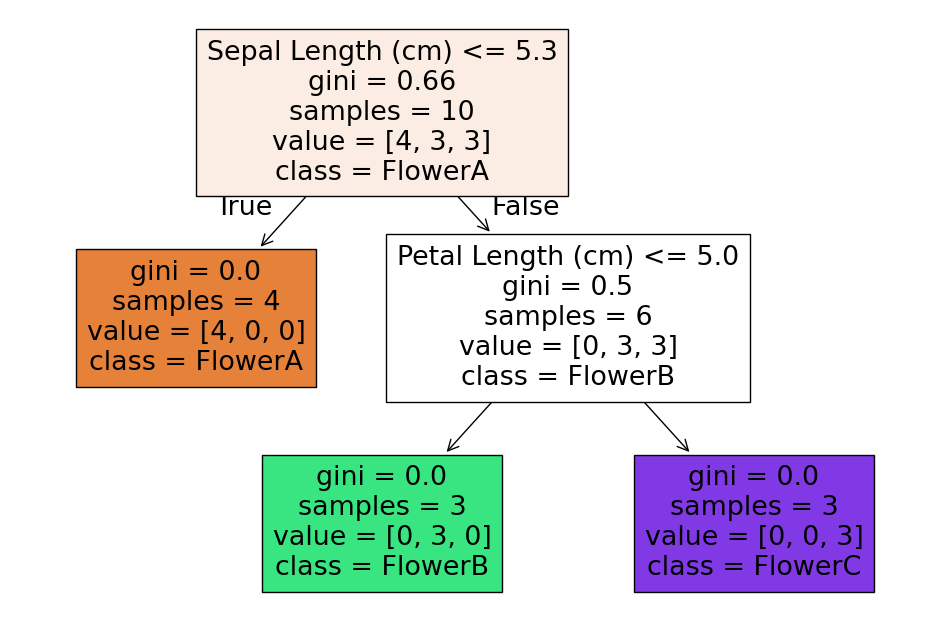

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dt_classifier, feature_names=X.columns, class_names=list(species_map.keys()), filled=True)
plt.show()

# Predict the species for the testing data and compute the accuracy.

In [22]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree Classifier: {accuracy:.2f}")

Accuracy of Decision Tree Classifier: 1.00


# Generate a classification report and a confusion matrix for the predictions.

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=species_map.keys()))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     FlowerA       1.00      1.00      1.00         1
     FlowerB       1.00      1.00      1.00         2
     FlowerC       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

Confusion Matrix:
[[1 0 0]
 [0 2 0]
 [0 0 2]]
